<center>
<h1>Homework Assignment 4</h1>
<br>
<h2>Predictive Analytics using Python (CIS432)</h2>
<h3>Simon Business School</h3>
<h3>Due date: 2/20/2018 23:55</h3>
</center> 

### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.

# Support vector machine

The questions are from the book "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani.

The book can be downloaded from the following link: <a href="http://www-bcf.usc.edu/~gareth/ISL/">link</a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [141]:
!pwd

/Users/pingguo/Desktop/Winter Quarter/Predictive Analytics/Homework/Homework 4 svm (MSBA)


## (1) Chapter 9, exercise 1

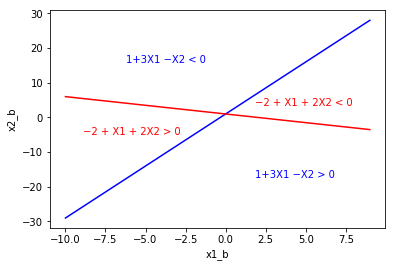

In [125]:
# Question 1 (a)
x1 = np.arange(-10,10,1)
x2 = 1 + 3*x1
plt.plot(x1,x2,'blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.figtext(0.3, 0.7, '1+3X1 −X2 < 0', color = 'blue')
plt.figtext(0.6, 0.3, '1+3X1 −X2 > 0', color = 'blue')

# Question 1 (b)
x1_b = np.arange(-10,10,1)
x2_b = 1 - x1_b/2
plt.plot(x1_b, x2_b, 'red')
plt.xlabel('x1_b')
plt.ylabel('x2_b')
plt.figtext(0.2, 0.45, '−2 + X1 + 2X2 > 0', color = 'red')
plt.figtext(0.6, 0.55, '−2 + X1 + 2X2 < 0', color = 'red')

## (2) Chapter 9, exercise 3

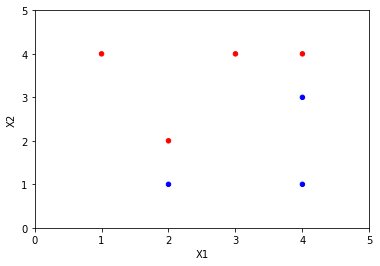

In [126]:
# (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
X1 = np.array([3,2,4,1,2,4,4])
X2 = np.array([4,2,4,4,1,3,1])
Y = np.array(['Red','Red','Red','Red','Blue','Blue','Blue'])
df = pd.DataFrame()
df['X1'] = X1
df['X2'] = X2
df['Y'] = Y
df.plot.scatter(x='X1', y='X2', c=df['Y'], xlim = [0,5], ylim = [0,5])

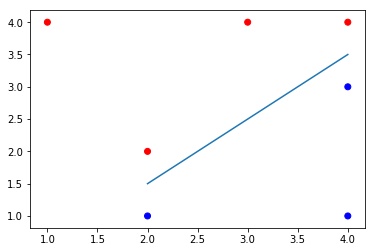

In [127]:
# (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

# As shown in the above graph, the optimal hyperplane should be between the point (2,1) and (2,2), the point (4,3)
# and (4,4). Therefore, the line should go through two piont (2,1.5) and (4,3.5)

# The equation of hyperplane is   X1 - X2 -0.5 = 0
plt.plot((2,4),(1.5,3.5))
plt.scatter(x=df['X1'], y=df['X2'], c=df['Y'])

### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

In this question, we need to find a separating hyperplane with maximal margin. We classify to Red if -0.5+X1-X2 <0, 
and classify to Blue if -0.5+X1-X2 >0. β0, β1, and β2 separatly equal to -0.5, 1 and -1. 

### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

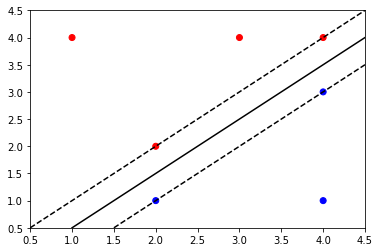

In [181]:
plt.scatter(x=df['X1'], y=df['X2'], c=df['Y'])
plt.xlim([0.5,4.5])
plt.ylim([0.5,4.5])
plt.plot((1,4.5),(0.5,4),'-k')
plt.plot((0.5,4.5),(0.5,4.5),'--k')
plt.plot((1.5,4.5),(0.5,3.5),'--k')

### (e) Indicate the support vectors for the maximal margin classifier.

We can easily find that the support vectors are the points (2,1), (2,2), (4,3) and (4,4).

### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

Because the seventh observation is (4,1), which is not the support vector and it is relatively far away from the
the margin line. Therefore, a slight movement would not affect the maximal margin hyperplane.

### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

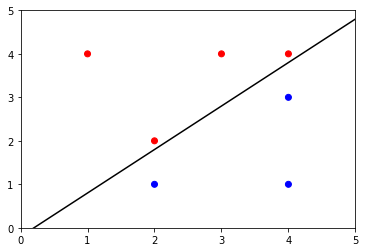

In [182]:
# for example, the line with equation of X1 - X2 -0.2 = 0 is not the optimal separating hyperplane, the sketch is 
# shown blow

plt.scatter(x=df['X1'], y=df['X2'], c=df['Y'])
plt.xlim([0,5])
plt.ylim([0,5])
X1_g = np.arange(0,6,1)
X2_g = X1_g - 0.2
plt.plot(X1_g,X2_g, '-k')

### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

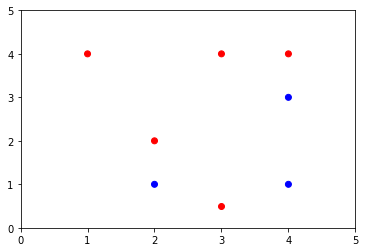

In [183]:
plt.scatter(x=df['X1'], y=df['X2'], c=df['Y'])
plt.xlim([0,5])
plt.ylim([0,5])
plt.scatter(x = 3, y = 0.5, c= 'red')

# When we add a red point (3,0.5), the two classes are obviously not separable by a hyperplane.

## (3) Feature expansion

The file 'data_nonlinear.csv' contains data for binary classification. 
1. Visualize the data.
2. Is the data linearly separable? explain your answer.
3. Construct an SVM classifier with polynomial kernel of degree 2 that perfectly classifies the dataset.
4. Expand the feature space and run a logistic regression model that attains perfect classification of the dataset. 
5. Is the logistic regression a linear model? explain your answer. 

In [184]:
# write solution here
# Question 1
df1 = pd.read_csv('data_nonlinear.csv')
df1.head(5)

,x1,x2,y
0,-0.112912,0.070666,1
1,-0.278967,0.108386,1
2,-0.219224,-0.329693,-1
3,-0.000366,-0.029985,-1
4,-0.000218,-0.051468,-1


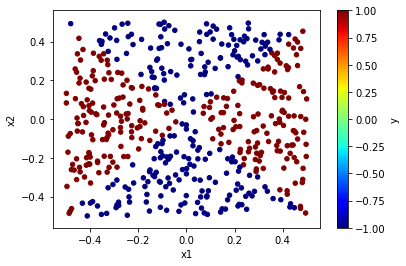

In [185]:
df1.plot.scatter(x='x1', y='x2', c='y', cmap='jet', sharex=False)

In [186]:
# Question 2
# In this question, the data is not linearly separable. We cannot separate blue and read point with single linear line.
# That is, there is no line can let one category observations all lie on same side of line.

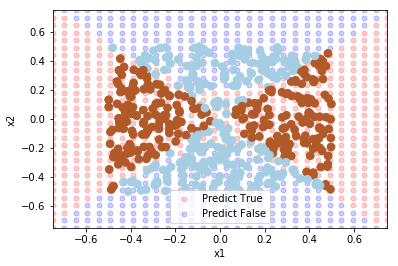

In [187]:
# Question 3
from sklearn import svm
clf = svm.SVC(kernel='poly', degree=2, C=1)  
clf.fit(df1[['x1','x2']], df1['y'])

# Visualize the prediction 
fig, ax = plt.subplots()
l=15
support = [(i,j) for i in np.linspace(-0.75,0.75,30) for j in np.linspace(-0.75,0.75,30)]
df1_background = pd.DataFrame(data=support, columns=['x1','x2'])
df1_background['prediction']=clf.predict(support) 
df1_background[df1_background['prediction']==1].plot.scatter('x1','x2',color='r', alpha=.2, s=25,ax=ax,label='Predict True')
df1_background[df1_background['prediction']==-1].plot.scatter('x1','x2',color='b',alpha=.2, s=25,ax=ax,label='Predict False')
ax.set_xlim([-0.75,0.75])
ax.set_ylim([-0.75,0.75])

# plot observations
plt.scatter(df1['x1'], df1['x2'], c=df1['y'], cmap=plt.cm.Paired,s=60)

# plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')

In [188]:
# Question 4
# Expand the features
from sklearn import preprocessing
feature = preprocessing.PolynomialFeatures()
dfExpand = feature.fit_transform(df1[['x1','x2']])
dfExpand = pd.DataFrame(dfExpand)
dfExpand.head(10)

,0,1,2,3,4,5
0,1.0,-0.112912,0.070666,1.274909e-02,-0.007979,0.004994
1,1.0,-0.278967,0.108386,7.782280e-02,-0.030236,0.011748
2,1.0,-0.219224,-0.329693,4.805914e-02,0.072276,0.108697
3,1.0,-0.000366,-0.029985,1.338964e-07,0.000011,0.000899
4,1.0,-0.000218,-0.051468,4.744108e-08,0.000011,0.002649
5,1.0,0.047476,-0.160269,2.254014e-03,-0.007609,0.025686
6,1.0,0.153769,-0.044200,2.364484e-02,-0.006797,0.001954
7,1.0,-0.343996,0.062101,1.183329e-01,-0.021362,0.003857
8,1.0,-0.326551,0.280569,1.066354e-01,-0.091620,0.078719
9,1.0,-0.227219,-0.034206,5.162850e-02,0.007772,0.001170


In [189]:
# Run the logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=10**10)
X_LR = dfExpand[[1,2,3,4,5]]
Y_LR = df1['y']
Lreg = LR.fit(X_LR, Y_LR)
Lreg

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [190]:
Lreg.score(X_LR,Y_LR)

1.0

In [191]:
# Question 5

# These observation is linearly separable and this logistic model is linear. Beacsue when we expand the features,
# the logistic regression score is almost 1.

## (4) Exercises from "Hands-on ML with scikit-learn and TensorFlow"

Read chapter 5 in "Hands-on ML with scikit-learn and TensorFlow" by Aurelien Geron.  

__Mandatory__: Answer questions 1-6 from the exercise section at the end of the chapter.

In [192]:
# write solution here
#Question 1: What is the fundamental idea behind the SVM.

# The fundamental idea behind SVM is to find a decision bundary to separate two class and training instance and
# get the largest possible margin between the decision boundary. If we perform the soft margin SVM classification,
# this model will get a compromise between perfectly separating the two classes and having the widest possible street.
# Another point is about the parameter when perform the SVM. That is the kernel in the model of nonlinear dataset

In [193]:
# Question 2: What is support vector?

# A support vector is the any observations which locate on the line of margin, or say the 'street', including the 
# border. The support vectors will determine the decision boundary. And any point or instance which is not the 
# support vector will not influence the decision boundary, as long as they are far away from the margin.
# Meanwhile, only the support vector will be involved in predicition computing, not all the dataset.

In [194]:
# Question 3: Why is it important to scale the inputs when using SVMs

# Because if we do not scale the dataset, the SVM model will tend to neglect the small features when finding the 
# best possible margin and decision boundary. This will lead to less accurate prediction.

In [195]:
# Question 4: Can SVM classifier output a confidence score when it classifies and instance? what about probability?

# Yes, it can. In the SVM classifier, the cofidence score is the distance between the test observation and the 
# decision boundary. However, we cannot directly get the probability by converting the confidence score. 
# If in the sklearn, we set the probability as True, then after training it can modify and get the probabilities
# using logistic regression on the confidence score. 

In [196]:
# Question 5: Should you use the primal or dual form of the SVM problem to train a model on a training set with 
# millions of instances and hundreds of features?

# Firstly, the computational complexity of primal form of SVM is proportional to the size of training dataset m.
# While for the dual form, it is proportional to a number between m2 and m3. Therefore, when we considern the millions 
# of instance, we should use primal form to get a much faster computational speed, the dual form will be slower.
# Furthermore, this situation applies to linear SVM because otherwise we can only use dual form.

In [197]:
# Questoin 6: Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should 
# you increase or decrear gamma? what about c?

# If we trained an SVM classifier with RBF kernel and the model seems to underfit the training set.
# We need to increase gamma or C, or both to decrease the regularization.

__Optional__: Answer questions 8-10 from the exercise section at the end of the chapter (not for grading by highly recommended)

Note: While the solutions are available in Appendix A and [online](https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb), answer the questions with your own words and do not copy paste code. You may submit additional data files if needed.